<a href="https://colab.research.google.com/github/joshi-swetam/Flower-Recognition-AI-ML-Model/blob/main/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Mount drive first and proceed
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
print(os.listdir('/content/gdrive/MyDrive/Project 4/Combined flowers'))

['daffodil', 'orchid', 'tulip', 'hydrangea', 'hibiscus', 'rose', 'dahlia', 'foxglove', 'sunflower', 'bougainvillea']


In [5]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [6]:
#['daffodil', 'orchid', 'tulip', 'hydrangea', 'hibiscus', 'rose', 'dahlia', 'foxglove', 'sunflower', 'bougainvillea']

X=[]
Z=[]
IMG_SIZE=150
Flower_bougainvillea='/content/gdrive/MyDrive/Project 4/Combined flowers/bougainvillea'
Flower_daffodil='/content/gdrive/MyDrive/Project 4/Combined flowers/daffodil'
Flower_dahlia='/content/gdrive/MyDrive/Project 4/Combined flowers/dahlia'
Flower_foxglove='/content/gdrive/MyDrive/Project 4/Combined flowers/foxglove'
Flower_hibiscus='/content/gdrive/MyDrive/Project 4/Combined flowers/hibiscus'
Flower_hydrangea='/content/gdrive/MyDrive/Project 4/Combined flowers/hydrangea'
Flower_orchid='/content/gdrive/MyDrive/Project 4/Combined flowers/orchid'
Flower_rose='/content/gdrive/MyDrive/Project 4/Combined flowers/rose'
Flower_sunflower='/content/gdrive/MyDrive/Project 4/Combined flowers/sunflower'
Flower_tulip='/content/gdrive/MyDrive/Project 4/Combined flowers/tulip'

In [7]:
def labels(image,flower):
    return flower

In [8]:
def train_data(flower_category,flower_path):
    for Image in tqdm(os.listdir(flower_path)):
        label=labels(Image,flower_category)
        path = os.path.join(flower_path,Image)
        Image = cv2.imread(path,cv2.IMREAD_COLOR)
        Image = cv2.resize(Image, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(Image))
        Z.append(str(label))

In [9]:
train_data('bougainvillea',Flower_bougainvillea)
print(len(X))

100%|██████████| 344/344 [00:26<00:00, 13.01it/s]

344


In [10]:
train_data('sunflower',Flower_sunflower)
print(len(X))

100%|██████████| 339/339 [00:25<00:00, 13.21it/s]

683


In [11]:
train_data('foxglove',Flower_foxglove)
print(len(X))

100%|██████████| 353/353 [00:24<00:00, 14.43it/s]

1036


In [12]:
train_data('dahlia',Flower_dahlia)
print(len(X))

100%|██████████| 330/330 [00:20<00:00, 16.05it/s]

1366


In [13]:
train_data('rose',Flower_rose)
print(len(X))

100%|██████████| 328/328 [00:19<00:00, 17.00it/s]

1694


In [14]:
train_data('hibiscus',Flower_hibiscus)
print(len(X))

100%|██████████| 314/314 [00:30<00:00, 10.23it/s]

2008


In [15]:
train_data('hydrangea',Flower_hydrangea)
print(len(X))

100%|██████████| 262/262 [00:16<00:00, 15.43it/s]

2270


In [16]:
train_data('tulip',Flower_tulip)
print(len(X))

100%|██████████| 315/315 [00:21<00:00, 14.63it/s]

2585


In [17]:
train_data('orchid',Flower_orchid)
print(len(X))

100%|██████████| 276/276 [00:17<00:00, 15.73it/s]

2861


In [18]:
train_data('daffodil',Flower_daffodil)
print(len(X))

100%|██████████| 268/268 [00:20<00:00, 13.06it/s]

3129


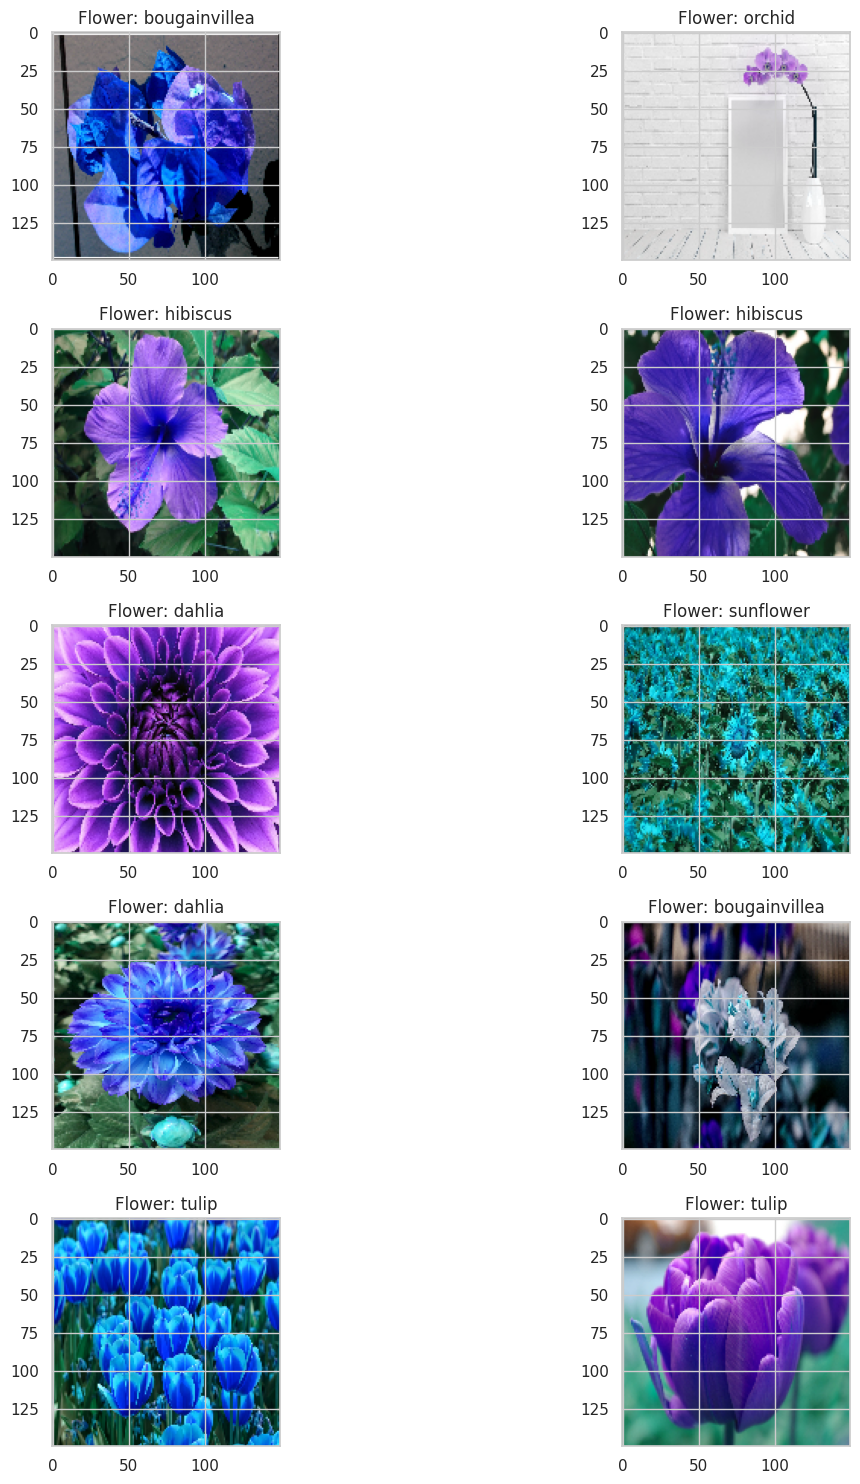

In [19]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()


In [20]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [22]:
np.random.seed(42)
rn.seed(42)


In [23]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [24]:
batch_size=64
epochs= 70

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [25]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [26]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/70
36/36 [==============================] - 119s 3s/step - loss: 2.0046 - accuracy: 0.2489 - val_loss: 1.7251 - val_accuracy: 0.3793
Epoch 2/70
36/36 [==============================] - 115s 3s/step - loss: 1.6991 - accuracy: 0.3677 - val_loss: 1.5980 - val_accuracy: 0.4189
Epoch 3/70
36/36 [==============================] - 125s 3s/step - loss: 1.6260 - accuracy: 0.4084 - val_loss: 1.4983 - val_accuracy: 0.4534
Epoch 4/70
36/36 [==============================] - 118s 3s/step - loss: 1.5288 - accuracy: 0.4540 - val_loss: 1.4808 - val_accuracy: 0.4764
Epoch 5/70
36/36 [==============================] - 116s 3s/step - loss: 1.4432 - accuracy: 0.4790 - val_loss: 1.4002 - val_accuracy: 0.5057
Epoch 6/70
36/36 [==============================] - 115s 3s/step - loss: 1.4195 - accuracy: 0.4917 - val_loss: 1.4471 - val_accuracy: 0.5006
Epoch 7/70
36/36 [==============================] - 116s 3s/step - loss: 1.3707 - accuracy: 0.4982 - val_loss: 1.3420 - val_accuracy: 0.5275
Epoch 8/70
36

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

25/25 - 8s - loss: 1.1070 - accuracy: 0.7407 - 8s/epoch - 312ms/step
Loss: 1.106952428817749, Accuracy: 0.7407407164573669


In [31]:
model.save('/content/gdrive/MyDrive/Project 4/model_74.h5')

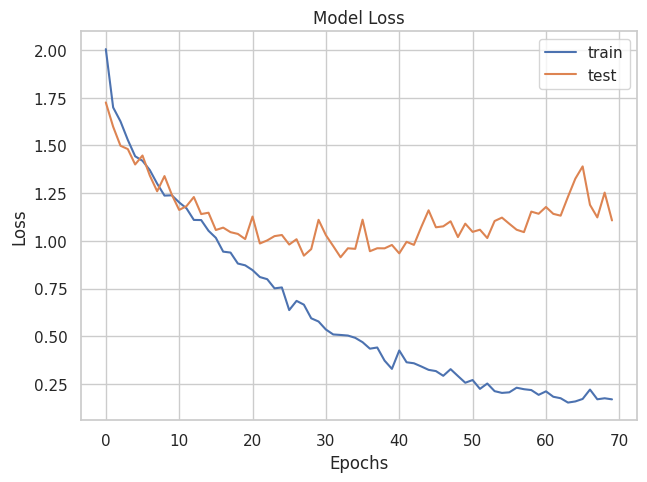

In [32]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

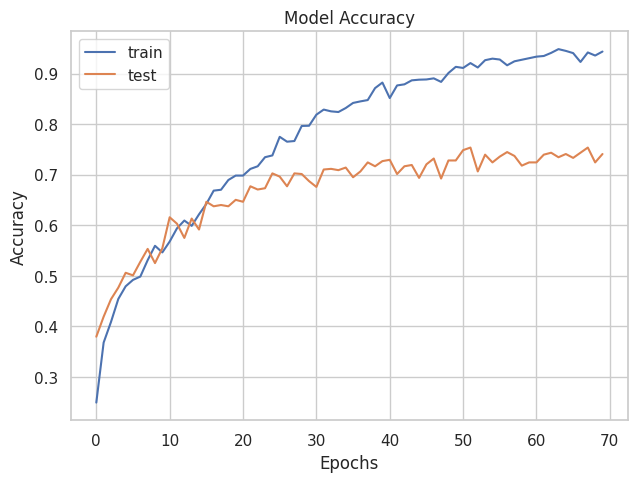

In [33]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [35]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
pred_digits[:1]

25/25 [==============================] - 9s 351ms/step


array([6])

In [36]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [37]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1


In [ ]:
ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))

In [38]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [39]:
predictions=model.predict(x_test)


25/25 [==============================] - 9s 361ms/step


In [40]:
from sklearn.utils.multiclass import unique_labels
# Convert one-hot encoded labels to class indices
test_labels_indices = np.argmax(y_test, axis=1)
predictions_indices = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(test_labels_indices, predictions_indices)

# Get class labels
classes = ['daffodil', 'orchid', 'tulip', 'hydrangea', 'hibiscus', 'rose', 'dahlia', 'foxglove', 'sunflower', 'bougainvillea']
class_count = len(classes)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(class_count) + .5, classes, rotation=90, fontsize=14)
plt.yticks(np.arange(class_count) + .5, classes, rotation=0, fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix")

plt.show()

In [42]:
from sklearn.metrics import classification_report

print(classification_report(predictions_indices, test_labels_indices))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66       130
           1       0.73      0.83      0.78        69
           2       0.73      0.76      0.74        84
           3       0.77      0.89      0.83        66
           4       0.83      0.84      0.83        75
           5       0.72      0.56      0.63        78
           6       0.63      0.60      0.62        68
           7       0.50      0.63      0.56        52
           8       0.95      0.91      0.93        98
           9       0.69      0.86      0.77        63

    accuracy                           0.74       783
   macro avg       0.73      0.75      0.73       783
weighted avg       0.75      0.74      0.74       783



In [ ]:
test_image = ('/content/gdrive/MyDrive/Predict/Hibiscus.jpg')